In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
df = pd.read_csv('Crimes_-_2001_to_Present (1).csv')

In [2]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"


In [3]:
df.shape

(8202272, 22)

In [4]:
# Display column names in the DataFrame
print(df.columns)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')


In [5]:
missing_rows = df[df.isnull().any(axis=1)]
missing_rows

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,5741943,HN549294,08/25/2007 09:22:18 AM,074XX N ROGERS AVE,0560,ASSAULT,SIMPLE,OTHER,False,False,...,49.0,1.0,08A,NaN,NaN,2007,08/17/2015 03:03:40 PM,NaN,NaN,NaN
5,1930689,HH109118,01/05/2002 09:24:00 PM,007XX E 103 ST,0820,THEFT,$500 AND UNDER,GAS STATION,True,False,...,NaN,NaN,06,NaN,NaN,2002,02/04/2016 06:33:39 AM,NaN,NaN,NaN
13,13579934,JH406506,08/20/2024 08:00:00 AM,043XX S ALBANY AVE,1120,DECEPTIVE PRACTICE,FORGERY,NaN,False,False,...,12.0,58.0,10,1156421.0,1875687.0,2024,09/02/2024 03:40:51 PM,41.814665,-87.701746,"(41.814665041, -87.701746474)"
37,12416972,JE293535,10/01/2020 12:01:00 AM,031XX W 53RD PL,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,...,14.0,63.0,02,NaN,NaN,2020,09/14/2023 03:41:59 PM,NaN,NaN,NaN
38,12416974,JE293464,08/10/2011 12:01:00 AM,031XX W 53RD PL,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,...,14.0,63.0,02,NaN,NaN,2011,09/14/2023 03:41:59 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8201829,13099981,JG292625,03/01/2022 12:00:00 AM,019XX S WABASH AVE,0460,BATTERY,SIMPLE,APARTMENT,False,False,...,3.0,33.0,08B,NaN,NaN,2022,06/08/2023 03:42:44 PM,NaN,NaN,NaN
8201845,13048752,JG230353,04/19/2023 10:35:00 PM,112XX S EDBROOKE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,9.0,49.0,11,1179199.0,1830533.0,2023,08/19/2023 03:40:26 PM,41.690268,-87.619568,"(41.69026756, -87.619568317)"
8202011,13048696,JG230576,04/19/2023 01:20:00 PM,004XX N WABASH AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,42.0,8.0,11,1176592.0,1902931.0,2023,08/19/2023 03:40:26 PM,41.888994,-87.626935,"(41.888993854, -87.626934833)"
8202131,13059297,JG243959,10/05/2019 01:30:00 PM,048XX W DEMING PL,0810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,31.0,19.0,06,NaN,NaN,2019,05/02/2023 03:43:43 PM,NaN,NaN,NaN


In [6]:
df.isnull().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13745
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614830
Community Area          613455
FBI Code                     0
X Coordinate             90189
Y Coordinate             90189
Year                         0
Updated On                   0
Latitude                 90189
Longitude                90189
Location                 90189
dtype: int64

In [7]:
# check what percentage of the data is missing
missing_data = df.isnull().sum() / len(df) * 100
missing_data = missing_data[missing_data > 0]
missing_data

Location Description    0.167576
District                0.000573
Ward                    7.495850
Community Area          7.479086
X Coordinate            1.099561
Y Coordinate            1.099561
Latitude                1.099561
Longitude               1.099561
Location                1.099561
dtype: float64

In [8]:
# Drop specified columns
df = df.drop(['ID', 'Case Number', 'Updated On'], axis=1)
# Drop rows with any missing values
df = df.dropna()

In [9]:
df.shape

(7496493, 19)

In [10]:
# Extracting meaningful feature from 'Date' column
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df['Day of Week'] = df['Date'].dt.dayofweek

C:\Users\onry_\AppData\Local\Temp\ipykernel_27296\1448923928.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [11]:
df.drop('Date', axis=1, inplace=True)
df.drop('Location', axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7496493 entries, 1 to 8202271
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Block                 object 
 1   IUCR                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Community Area        float64
 11  FBI Code              object 
 12  X Coordinate          float64
 13  Y Coordinate          float64
 14  Year                  int64  
 15  Latitude              float64
 16  Longitude             float64
 17  Month                 int32  
 18  Day                   int32  
 19  Hour                  int32  
 20  Minute                int32  
 21  Day of Week           int32  
dtypes: bool(2), float64(7), int32(5), int64(2), obj

In [13]:
df.isnull().sum()

Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Latitude                0
Longitude               0
Month                   0
Day                     0
Hour                    0
Minute                  0
Day of Week             0
dtype: int64

In [14]:
# checking unique values in 'Primary Type' column
df['Primary Type'].unique()

array(['HOMICIDE', 'BURGLARY', 'BATTERY', 'CRIMINAL DAMAGE',
       'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT',
       'CRIMINAL SEXUAL ASSAULT', 'THEFT', 'OFFENSE INVOLVING CHILDREN',
       'ROBBERY', 'ASSAULT', 'OTHER OFFENSE', 'SEX OFFENSE',
       'WEAPONS VIOLATION', 'STALKING', 'OBSCENITY', 'CRIMINAL TRESPASS',
       'PROSTITUTION', 'ARSON', 'NARCOTICS', 'KIDNAPPING',
       'CONCEALED CARRY LICENSE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'PUBLIC PEACE VIOLATION',
       'LIQUOR LAW VIOLATION', 'NON-CRIMINAL', 'INTIMIDATION', 'GAMBLING',
       'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'CRIM SEXUAL ASSAULT', 'RITUALISM',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [15]:
# checking unique values in 'Location Description' column
df['Location Description'].unique()

array(['STREET', 'PARKING LOT', 'APARTMENT', 'SMALL RETAIL STORE',
       'PARKING LOT / GARAGE (NON RESIDENTIAL)',
       'AIRPORT EXTERIOR - NON-SECURE AREA', 'GAS STATION',
       'DAY CARE CENTER', 'CREDIT UNION', 'RESIDENCE - GARAGE',
       'RESIDENCE - PORCH / HALLWAY', 'CURRENCY EXCHANGE', 'RESIDENCE',
       'AUTO / BOAT / RV DEALERSHIP',
       'POLICE FACILITY / VEHICLE PARKING LOT', 'DEPARTMENT STORE',
       'CHA PARKING LOT / GROUNDS', 'RESTAURANT', 'GROCERY FOOD STORE',
       'APPLIANCE STORE', 'OTHER (SPECIFY)',
       'RESIDENCE - YARD (FRONT / BACK)', 'ALLEY', 'SIDEWALK',
       'VEHICLE NON-COMMERCIAL', 'VACANT LOT / LAND', 'BAR OR TAVERN',
       'CAR WASH', 'HOSPITAL BUILDING / GROUNDS',
       'COMMERCIAL / BUSINESS OFFICE', 'DRIVEWAY - RESIDENTIAL',
       'PARK PROPERTY', 'BANK', 'DRUG STORE',
       'LAKEFRONT / WATERFRONT / RIVERBANK', 'SCHOOL - PUBLIC BUILDING',
       'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
       'NURSING / RETIREMENT HOME', 'HOTEL /

In [16]:
# checking in FBI Code column
df['FBI Code'].unique()

array(['01A', '05', '08B', '14', '11', '07', '04B', '10', '02', '06',
       '26', '03', '08A', '17', '15', '04A', '16', '09', '18', '20', '24',
       '13', '22', '19', '12', '01B', '27'], dtype=object)

In [17]:
# group Primary type into different categories
crime_categories = {
    'HOMICIDE': 'Violent Crime',
    'ASSAULT': 'Violent Crime',
    'BATTERY': 'Violent Crime',
    'ROBBERY': 'Violent Crime',
    'CRIMINAL SEXUAL ASSAULT': 'Violent Crime',
    'SEX OFFENSE': 'Violent Crime',
    'KIDNAPPING': 'Violent Crime',
    'STALKING': 'Violent Crime',
    'INTIMIDATION': 'Violent Crime',
    'CRIM SEXUAL ASSAULT': 'Violent Crime',
    'WEAPONS VIOLATION': 'Violent Crime',
    'BURGLARY': 'Property Crime',
    'MOTOR VEHICLE THEFT': 'Property Crime',
    'THEFT': 'Property Crime',
    'CRIMINAL DAMAGE': 'Property Crime',
    'ARSON': 'Property Crime',
    'CRIMINAL TRESPASS': 'Property Crime',
    'NARCOTICS': 'Drug Crime',
    'OTHER NARCOTIC VIOLATION': 'Drug Crime',
    'OFFENSE INVOLVING CHILDREN': 'Child/Other Offense',
    'INTERFERENCE WITH PUBLIC OFFICER': 'Public Offense',
    'PUBLIC PEACE VIOLATION': 'Public Offense',
    'LIQUOR LAW VIOLATION': 'Public Offense',
    'HUMAN TRAFFICKING': 'Child/Other Offense',
    'NON-CRIMINAL': 'Non-Criminal',
    'NON-CRIMINAL (SUBJECT SPECIFIED)': 'Non-Criminal',
    'NON - CRIMINAL': 'Non-Criminal',
    'DECEPTIVE PRACTICE': 'Other Offense',
    'OBSCENITY': 'Other Offense',
    'GAMBLING': 'Other Offense',
    'PROSTITUTION': 'Other Offense',
    'PUBLIC INDECENCY': 'Other Offense',
    'CONCEALED CARRY LICENSE VIOLATION': 'Other Offense',
    'OTHER OFFENSE': 'Other Offense',
    'RITUALISM': 'Other Offense'
}

# map primary types to broader categories
df['Primary Type Group'] = df['Primary Type'].map(crime_categories)

In [18]:
# check for unmapped categories
unmapped = df[df['Primary Type Group'].isnull()]['Primary Type'].unique()
print("Unmapped Categories:", unmapped)

Unmapped Categories: []


In [19]:
arrest_rates = df.groupby('Primary Type Group')['Arrest'].mean()
print(arrest_rates)

Primary Type Group
Child/Other Offense    0.184836
Drug Crime             0.993227
Non-Criminal           0.102679
Other Offense          0.229822
Property Crime         0.120019
Public Offense         0.764085
Violent Crime          0.223114
Name: Arrest, dtype: float64


In [20]:
# mapping location descriptions to broader categories
location_categories = {
    # Residential
    'APARTMENT': 'Residential',
    'HOUSE': 'Residential',
    'RESIDENCE': 'Residential',
    'RESIDENCE - PORCH / HALLWAY': 'Residential',
    'RESIDENCE - YARD (FRONT / BACK)': 'Residential',
    'ROOMING HOUSE': 'Residential',
    'DRIVEWAY - RESIDENTIAL': 'Residential',
    'CHA APARTMENT': 'Residential',
    'COACH HOUSE': 'Residential',
    
    # Commercial
    'SMALL RETAIL STORE': 'Commercial',
    'RETAIL STORE': 'Commercial',
    'GROCERY FOOD STORE': 'Commercial',
    'DEPARTMENT STORE': 'Commercial',
    'BAR OR TAVERN': 'Commercial',
    'TAVERN': 'Commercial',
    'LIQUOR STORE': 'Commercial',
    'CONVENIENCE STORE': 'Commercial',
    'RESTAURANT': 'Commercial',
    'DRUG STORE': 'Commercial',
    
    # Public Spaces
    'STREET': 'Public Space',
    'SIDEWALK': 'Public Space',
    'PARK PROPERTY': 'Public Space',
    'ALLEY': 'Public Space',
    'BEACH': 'Public Space',
    'FOREST PRESERVE': 'Public Space',
    'VACANT LOT / LAND': 'Public Space',
    
    # Transportation
    'CTA TRAIN': 'Transportation',
    'CTA BUS': 'Transportation',
    'TAXICAB': 'Transportation',
    'VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER, LYFT)': 'Transportation',
    'HIGHWAY / EXPRESSWAY': 'Transportation',
    'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA': 'Transportation',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA': 'Transportation',
    'AIRPORT TRANSPORTATION SYSTEM (ATS)': 'Transportation',
    
    # Educational
    'SCHOOL - PUBLIC BUILDING': 'Educational',
    'PUBLIC HIGH SCHOOL': 'Educational',
    'COLLEGE / UNIVERSITY - GROUNDS': 'Educational',
    'COLLEGE / UNIVERSITY - RESIDENCE HALL': 'Educational',
    'SCHOOL - PRIVATE BUILDING': 'Educational',
    
    # Medical
    'HOSPITAL': 'Medical',
    'MEDICAL / DENTAL OFFICE': 'Medical',
    'NURSING / RETIREMENT HOME': 'Medical',
    'NURSING HOME/RETIREMENT HOME': 'Medical',
    
    # Government or Law Enforcement
    'POLICE FACILITY / VEHICLE PARKING LOT': 'Government',
    'COUNTY JAIL': 'Government',
    'JAIL / LOCK-UP FACILITY': 'Government',
    'FEDERAL BUILDING': 'Government',
    'GOVERNMENT BUILDING': 'Government',
    
    # Other
    'FACTORY': 'Other',
    'CEMETARY': 'Other',
    'CHURCH / SYNAGOGUE / PLACE OF WORSHIP': 'Other',
    'HORSE STABLE': 'Other'
}

# map the location descriptions to broader categories
df['Location Group'] = df['Location Description'].map(location_categories)

In [21]:
# fill unmapped values with 'Other'
df['Location Group'] = df['Location Group'].fillna('Other')

In [22]:
print(df['Location Group'].unique())

['Public Space' 'Other' 'Residential' 'Commercial' 'Government'
 'Educational' 'Transportation' 'Medical']


Location Group
Commercial        0.329715
Educational       0.067335
Government        0.474011
Medical           0.070561
Other             0.247647
Public Space      0.326413
Residential       0.141315
Transportation    0.173840
Name: Arrest, dtype: float64


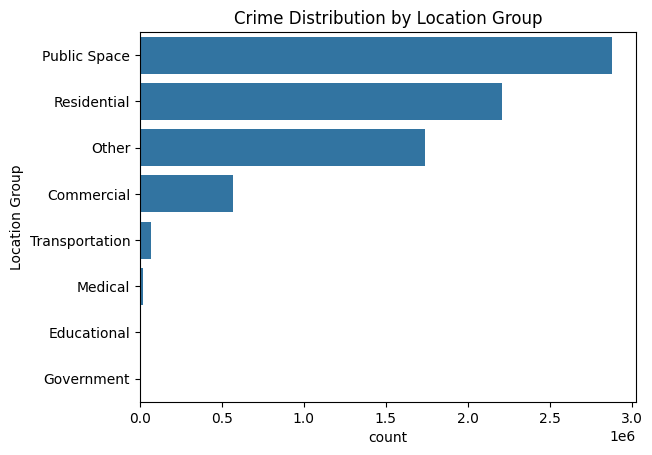

In [23]:
# calculate arrest rates by location group
arrest_rates = df.groupby('Location Group')['Arrest'].mean()
print(arrest_rates)

# plot the distribution of crimes by location group
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y='Location Group', data=df, order=df['Location Group'].value_counts().index)
plt.title('Crime Distribution by Location Group')
plt.show()

In [24]:
# looking at unique values in 'ward' column
df['Ward'].unique()

array([36., 50., 47.,  6., 42., 41., 27., 14., 34.,  7.,  4., 31., 40.,
       30., 18., 21., 17., 11., 28., 29., 46., 37., 10., 26.,  8., 16.,
        5., 39.,  1.,  9.,  3., 20., 35., 32., 33., 23., 45., 38., 24.,
       43., 49., 19., 15., 22., 48., 25., 44., 12., 13.,  2.])

In [25]:
df['District'].unique()

array([25., 17., 19.,  6.,  1., 16., 11.,  8.,  4.,  2., 20., 12.,  3.,
        7., 22.,  9., 14.,  5., 15., 10., 24., 18., 31., 21.])

In [26]:
df['Community Area'].unique()

array([19., 13.,  5., 44., 32., 76., 23., 66., 33., 46., 39.,  2., 28.,
       43., 21., 63., 70., 69., 73., 67., 60., 27., 26., 25.,  6., 52.,
       24., 45., 68., 11., 50., 38., 40., 22., 14., 65., 71., 15., 10.,
       41., 18., 49., 29., 35., 42.,  3.,  7., 30.,  1.,  8., 74., 61.,
       16., 56., 54., 58., 31., 48., 77.,  9., 51.,  4., 20., 57., 75.,
       55., 53., 34., 17., 37., 36., 12., 72., 62., 47., 64., 59.,  0.])

In [27]:
df['Beat'].unique()

array([2515, 1711, 1922,  632,  122, 1654, 1121,  823,  131,  422,  222,
       2514, 2011,  113, 1225,  333, 1732,  822,  835,  731, 2222,  735,
        915, 1124, 1122, 2513, 1925, 1111,  432, 1211, 2232,  631,  411,
        724,  324, 1621,  733, 2522, 1433,  531,  224,  232, 1431,  423,
       1412, 1421, 1432, 1424, 1712, 1422,  833, 2512, 2532, 2524,  621,
       2533,  831, 1622, 1634,  234, 2521,  614, 1531, 2511,  512,  825,
        221, 1021,  233,  421,  513, 1212,  611,  723,  124,  211,  711,
        824,  314, 1914,  913, 1935, 1214, 1024,  832, 2423, 1423, 2523,
       1832, 1533, 2211,  334, 1913,  924, 1224, 1731,  133, 1113, 1011,
       1532, 1623, 1131, 1614,  612, 1713,  815,  533,  722,  321, 2024,
        821, 1233, 1722, 1823,  323,  511,  925,  613, 1235,  914,  932,
        412, 1511, 2013, 1611,  322, 1115,  434, 2534, 2032,  132, 1135,
       1523,  215, 1222,  633, 2234, 2031,  712,  313,  433, 1524, 1133,
       1911, 1012, 1915,  734,  522,  331, 2413, 11

In [28]:
df['Domestic'].unique()

array([False,  True])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7496493 entries, 1 to 8202271
Data columns (total 24 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Block                 object 
 1   IUCR                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Community Area        float64
 11  FBI Code              object 
 12  X Coordinate          float64
 13  Y Coordinate          float64
 14  Year                  int64  
 15  Latitude              float64
 16  Longitude             float64
 17  Month                 int32  
 18  Day                   int32  
 19  Hour                  int32  
 20  Minute                int32  
 21  Day of Week           int32  
 22  Primary Type Group    object 
 23  Location Gro

In [30]:
# dropping Block, and Primary Type columns
df.drop(['Block', 'Primary Type'], axis=1, inplace=True)
df.drop(['Location Description'], axis=1, inplace=True)


In [31]:
# drop X Coordinate and Y Coordinate columns
df.drop(['X Coordinate', 'Y Coordinate'], axis=1, inplace=True)

In [32]:
df['Description'].unique()

array(['FIRST DEGREE MURDER', 'UNLAWFUL ENTRY',
       'AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MINOR INJURY',
       'TO VEHICLE', 'THEFT BY LESSEE, MOTOR VEHICLE',
       'DOMESTIC BATTERY SIMPLE', 'AUTOMOBILE',
       'AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SERIOUS INJURY',
       'FINANCIAL IDENTITY THEFT OVER $ 300', 'FORGERY',
       'ILLEGAL USE CASH CARD', 'NON-AGGRAVATED', '$500 AND UNDER',
       'TO PROPERTY', 'OVER $500', 'FROM BUILDING', 'BOGUS CHECK',
       'CHILD ABDUCTION', 'ATTEMPT - FINANCIAL IDENTITY THEFT',
       'ARMED - HANDGUN', 'SIMPLE', 'PREDATORY', 'VEHICULAR HIJACKING',
       'HARASSMENT BY ELECTRONIC MEANS',
       'AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER',
       'SEXUAL EXPLOITATION OF A CHILD',
       'AGGRAVATED CRIMINAL SEXUAL ABUSE', 'RECKLESS FIREARM DISCHARGE',
       'CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER',
       'AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER',
       'CYBERSTALKING', 'AGGRAVATED - OTHER', 'RETAIL THEFT'

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7496493 entries, 1 to 8202271
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   IUCR                object 
 1   Description         object 
 2   Arrest              bool   
 3   Domestic            bool   
 4   Beat                int64  
 5   District            float64
 6   Ward                float64
 7   Community Area      float64
 8   FBI Code            object 
 9   Year                int64  
 10  Latitude            float64
 11  Longitude           float64
 12  Month               int32  
 13  Day                 int32  
 14  Hour                int32  
 15  Minute              int32  
 16  Day of Week         int32  
 17  Primary Type Group  object 
 18  Location Group      object 
dtypes: bool(2), float64(5), int32(5), int64(2), object(5)
memory usage: 900.8+ MB


In [34]:
def assign_description_group_v3(description):
    # Violent Crimes
    if any(keyword in description for keyword in [
        'MURDER', 'ASSAULT', 'ABUSE', 'BATTERY', 'CRIMINAL SEXUAL', 'AGG', 'VIOLENT', 'HOMICIDE',
        'KIDNAPPING', 'ARMED', 'RITUAL', 'FISTS', 'FEET', 'INJURY', 'STRONGARM', 'UNLAWFUL RESTRAINT',
        'FORCIBLE ENTRY', 'PREDATORY', 'RECKLESS CONDUCT', 'INTIMIDATION', 'HOME INVASION', 
        'FORCIBLE DETENTION', 'MOB ACTION', 'VEHICULAR HIJACKING', 'CRIMINAL TRANSMISSION OF HIV', 
        'INVOLUNTARY MANSLAUGHTER', 'ANIMAL FIGHTING', 'SEX RELATION', 'TELEPHONE THREAT']):
        return 'Violent Crime'
    
    # Property Crimes
    elif any(keyword in description for keyword in [
        'THEFT', 'BURGLARY', 'AUTOMOBILE', 'VEHICLE', 'ARSON', 'TAMPER', 'PROPERTY', 'LOOTING',
        'COIN', 'RESIDENCE', 'BUILDING', 'FALSE POLICE REPORT', 'CYCLE', 'BIKE', 'POCKET-PICKING',
        'PURSE-SNATCHING', 'VANDALISM', 'TO STATE SUP LAND', 'TO LAND', 'TO STATE SUP PROP',
        'TO FIRE FIGHT.APP.EQUIP', 'UNLAWFUL ENTRY', 'ILLEGAL USE CASH CARD', '$500 AND UNDER', 
        'OVER $500', 'BOGUS CHECK', 'TRUCK, BUS, MOTOR HOME', 'ATTEMPT - TRUCK, BUS, MOTOR HOME', 
        'STOLEN PROP', 'OVER $300', '$300 AND UNDER','CRIMINAL DEFACEMENT']):
        return 'Property Crime'
    
    # Financial Crimes
    elif any(keyword in description for keyword in [
        'FRAUD', 'CREDIT CARD', 'COUNTERFEIT', 'FORGERY', 'FINANCIAL', 'IDENTITY', 'EMBEZZLEMENT',
        'MISCONDUCT', 'MONEY LAUNDERING', 'BRIBERY', 'DECEPTIVE COLLECTION', 'ALTER / FORGE',
        'BIGAMY', 'PAY TV SERVICE', 'SELL / ADVERTISE', 'FALSE / STOLEN / ALTERED TRP', 
        'FINAN EXPLOIT', 'ALTER/FORGE PRESCRIPTION','FALSE INFO', 'FALSE/STOLEN/ALTERED TRP', 'REGISTER OF SALES BY DEALER']):
        return 'Financial Crime'
    
    # Sexual Offenses
    elif any(keyword in description for keyword in [
        'SEXUAL', 'CHILD PORNOGRAPHY', 'SOLICITATION', 'OBSCENE', 'INDECENT', 'RELATIONS', 'PROSTITUTE',
        'EXPLOITATION', 'ASSAULT OF CHILD', 'RAPE', 'UNAUTHORIZED VIDEOTAPING', 'COMMERCIAL SEX ACTS',
        'KEEP PLACE OF PROSTITUTION', 'KEEP PLACE OF JUV PROSTITUTION', 'POS: PORNOGRAPHIC PRINT', 
        'SEX OFFENDER', 'POST GRAPHIC INFO', 'OTHER PROSTITUTION OFFENSE']):
        return 'Sexual Offense'
    
    # Weapon Offenses
    elif any(keyword in description for keyword in [
        'WEAPON', 'FIREARM', 'GUN', 'KNIFE', 'EXPLOSIVE', 'AMMUNITION', 'ARMOR', 'METAL PIERCING BULLETS',
        'ARSON THREAT', 'UNLAWFUL USE / SALE', 'TIRE DEFLATION DEVICE', 
        'PLACE VIDEO RECORD/TRANSMIT DEVICE', 'UNAUTH VIDEO RECORD']):
        return 'Weapon Offense'
    
    # Public Order Offenses
    elif any(keyword in description for keyword in [
        'PUBLIC', 'PROHIBITED', 'OBSTRUCT', 'LICENSE', 'VIOLATION', 'INDECENCY', 'DEMONSTRATION',
        'TRESPASSING', 'FAILURE TO REGISTER', 'DISORDERLY', 'BOMB THREAT', 'FALSE FIRE ALARM',
        'HARASSMENT', 'GAME/DICE', 'GAME / AMUSEMENT DEVICE', 'INTERFERENCE', 'PEEPING TOM', 
        'FORNICATION', 'REFUSING TO AID', 'IN TAVERN', 'SALE TOBACCO PRODUCTS', 'COMPELLING CONFESSION',
        'NOTIFICATION', 'DISCLOSE', 'VIOLATE ORDER OF PROTECTION', 'SOLICIT', 'SALE OF TOBACCO', 
        'MINOR MISREPRESENT AGE', 'BOLITA', 'PANDERING','ILLEGAL CONSUMPTION BY MINOR', 'SELL/GIVE/DEL LIQUOR TO MINOR', 'OBSCENITY', 
        'GAME/AMUSEMENT DEVICE', 'GAME/CARDS', 'BOOKMAKING', 'WIREROOM', 'INTERFERE W/ EMERGENCY EQUIP']):
        return 'Public Order Offense'
    
    # Drug-Related Crimes
    elif any(keyword in description for keyword in [
        'DRUG', 'CANNABIS', 'HEROIN', 'COCAINE', 'NARCOTICS', 'DELIVER', 'POSSESS', 'METHAMPHETAMINE',
        'PCP', 'SYNTHETIC', 'HALLUCINOGENS', 'HYPODERMIC NEEDLE', 'INTOXICATING', 'CHEMICAL', 'DRY-ICE',
        'POSS', 'FAILURE TO MAINTAIN RECORDS','DEL CONT SUBS TO PERSON', 'FAIL REGISTER LIC', 'CONT SUBS']):
        return 'Drug-Related Crime'
    
    # Human Trafficking and Exploitation
    elif any(keyword in description for keyword in [
        'TRAFFICKING', 'SERVITUDE', 'EXPLOITATION', 'DELIVERY OF CONTROLLED SUBSTANCES', 'CHILD',
        'PIMPING', 'HARBOR', 'CONTRIBUTE TO THE DELINQUENCY', 'CONTRIBUTE CRIM DELINQUENCY']):
        return 'Human Trafficking'
    
    # Miscellaneous Crimes
    elif any(keyword in description for keyword in [
        'IMPERSONATION', 'ESCAPE', 'EAVESDROPPING', 'UNLAWFUL USE OF RECORDED SOUND', 'ADULTRY',
        'LOST PASSPORT', 'FOID', 'FOUND PASSPORT', 'FAILURE TO KEEP', 'COMPOUNDING A CRIME',
        'POLICY/OTHER', 'EDUCATIONAL', 'LOTTERY', 'REGISTER FED GAMBLING', 'LOTTERY/PARLAY CARDS', 
        'CONTRABAND IN PRISON', 'UNIDENTIFIABLE RECORDING','CYBERSTALKING', 'MARRYING A BIGAMIST']):
        return 'Miscellaneous Crime'
    
    # Default fallback
    else:
        return 'Other'

# Apply the updated grouping logic
df['Description Group'] = df['Description'].apply(assign_description_group_v3)

# Verify the distribution
print(df['Description Group'].value_counts())


Description Group
Property Crime          3378338
Violent Crime           1888520
Other                    871683
Drug-Related Crime       651948
Public Order Offense     341136
Financial Crime          184938
Weapon Offense           136221
Sexual Offense            22588
Human Trafficking         16947
Miscellaneous Crime        4174
Name: count, dtype: int64


In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # Limit the number of features
tfidf_matrix = vectorizer.fit_transform(df['Description'])

# 2. Convert sparse matrix to DataFrame for a subset
# Use all features for the selected rows
tfidf_df_sample = pd.DataFrame(
    tfidf_matrix[:1000, :].toarray(),  # Process the first 1000 rows
    columns=vectorizer.get_feature_names_out(),  # Use all feature names (matching shape)
)

# 3. Add Description and Description Group for comparison
tfidf_df_sample['Description'] = df['Description'][:1000].values
tfidf_df_sample['Description Group'] = df['Description Group'][:1000].values

# 4. Save a sample of the TF-IDF and description group comparison to a CSV file
tfidf_df_sample.to_csv('tfidf_description_comparison_sample.csv', index=False)

# 5. Sparse matrix row-wise summary for the entire dataset
df['TF-IDF Score'] = tfidf_matrix.sum(axis=1).A1  # Sum along rows, keep it sparse

# 6. Save the full comparison with description group
comparison_df = df[['Description', 'Description Group', 'TF-IDF Score']]
comparison_df.to_csv('description_tfidf_comparison_full.csv', index=False)


In [36]:
# in case i want to use the other grouping
df_with_both_groupings = df.copy()

In [37]:
df.drop(['Description Group'], axis=1, inplace=True)

In [38]:
df.drop(['Description'], axis=1, inplace=True)

In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of columns to label encode
columns_to_encode = ['Beat', 'District', 'Ward', 'Community Area', 
                     'IUCR', 'FBI Code', 'Primary Type Group', 'Location Group']

# Initialize the label encoder
encoder = LabelEncoder()

# Apply label encoding
for col in columns_to_encode:
    df[col] = df[col].astype(str)
    df[f'{col} Encoded'] = encoder.fit_transform(df[col])

# Display the first few rows to verify
print(df.head())

   IUCR  Arrest  Domestic  Beat District  Ward Community Area FBI Code  Year  \
1  0110    True     False  2515     25.0  36.0           19.0      01A  2021   
2  0110    True     False  1711     17.0  50.0           13.0      01A  2021   
3  0620   False     False  1922     19.0  47.0            5.0       05  2023   
4  0454    True     False   632      6.0   6.0           44.0      08B  2023   
6  1320   False     False   122      1.0  42.0           32.0       14  2023   

    Latitude  ...  Location Group  TF-IDF Score  Beat Encoded  \
1  41.917838  ...    Public Space      1.732051           202   
2  41.995219  ...           Other      1.732051           102   
3  41.952345  ...     Residential      1.410462           129   
4  41.737751  ...      Commercial      2.595978           256   
6  41.886018  ...           Other      1.404782            37   

   District Encoded  Ward Encoded  Community Area Encoded IUCR Encoded  \
1                15            29                     

In [40]:
# make a copy of the df before dropping the columns that were just encoded
df_encoded = df.copy()

In [41]:
# List of original columns to drop (ones that have been encoded)
columns_to_drop = ['Beat', 'District', 'Ward', 'Community Area', 
                   'IUCR', 'FBI Code', 'Primary Type Group', 'Location Group']

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Verify the DataFrame
print(df.head())

   Arrest  Domestic  Year   Latitude  Longitude  Month  Day  Hour  Minute  \
1    True     False  2021  41.917838 -87.755969      5   24    15       6   
2    True     False  2021  41.995219 -87.713355      6   26     9      24   
3   False     False  2023  41.952345 -87.677975     11    9     7      30   
4    True     False  2023  41.737751 -87.604856     11   12     7      59   
6   False     False  2023  41.886018 -87.633938      9    6    17       0   

   Day of Week  TF-IDF Score  Beat Encoded  District Encoded  Ward Encoded  \
1            0      1.732051           202                15            29   
2            5      1.732051           102                 7            45   
3            3      1.410462           129                 9            41   
4            6      2.595978           256                20            46   
6            2      1.404782            37                 0            36   

   Community Area Encoded  IUCR Encoded  FBI Code Encoded  \
1      

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7496493 entries, 1 to 8202271
Data columns (total 19 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Arrest                      bool   
 1   Domestic                    bool   
 2   Year                        int64  
 3   Latitude                    float64
 4   Longitude                   float64
 5   Month                       int32  
 6   Day                         int32  
 7   Hour                        int32  
 8   Minute                      int32  
 9   Day of Week                 int32  
 10  TF-IDF Score                float64
 11  Beat Encoded                int32  
 12  District Encoded            int32  
 13  Ward Encoded                int32  
 14  Community Area Encoded      int32  
 15  IUCR Encoded                int32  
 16  FBI Code Encoded            int32  
 17  Primary Type Group Encoded  int32  
 18  Location Group Encoded      int32  
dtypes: bool(2), float64(3), in

In [43]:
# sample 1,000,000 rows from the dataset
df_sample = df.sample(n=1000000, random_state=42)
df_sample.shape
df_sample['Arrest'].value_counts()

Arrest
False    747700
True     252300
Name: count, dtype: int64

In [44]:
# stratified sampling on dataset
from sklearn.model_selection import train_test_split

# Define the target column (e.g., 'Arrest') and the desired sample size
target_column = 'Arrest'
sample_size = 1000000

# Perform stratified sampling
_, df_stratified = train_test_split(
    df, 
    test_size=sample_size / len(df),  
    stratify=df[target_column],       
    random_state=42
)

# Save stratified sample into a new DataFrame
print(f"Stratified sample size: {df_stratified.shape}")
print(df_stratified[target_column].value_counts(normalize=True)) 

Stratified sample size: (1000000, 19)
Arrest
False    0.748262
True     0.251738
Name: proportion, dtype: float64


### Model Building

In [47]:
from sklearn.model_selection import train_test_split

# Assuming 'Arrest' is the target variable
X = df_sample.drop(columns=['Arrest'])  
y = df_sample['Arrest']                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
# X, y with df_stratified
X_stratified = df_stratified.drop(columns=['Arrest'])  # Features
y_stratified = df_stratified['Arrest']                # Target

X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X_stratified, y_stratified, test_size=0.2, random_state=42, stratify=y_stratified)

In [49]:
# apply SMOTE only on the training set
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the balance of the resampled target variable
y_train_resampled.value_counts()

Arrest
False    598160
True     598160
Name: count, dtype: int64

In [52]:
# apply SMOTEENN only to the stratified training set
from imblearn.combine import SMOTEENN

# Initialize the SMOTEENN object
smote_enn = SMOTEENN(random_state=42)

# Apply SMOTEENN to the stratified training data
X_train_resampled_stratified, y_train_resampled_stratified = smote_enn.fit_resample(X_train_stratified, y_train_stratified)

# Check the balance of the resampled target variable
y_train_resampled_stratified.value_counts()

Arrest
True     518266
False    403630
Name: count, dtype: int64

In [54]:
# XGBoost with y_train_resampled_stratified
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Initialize the XGBClassifier
xgb_clf = XGBClassifier(random_state=42)

# Fit the model
xgb_clf.fit(X_train_resampled_stratified, y_train_resampled_stratified)

# Predict on the test set
y_pred = xgb_clf.predict(X_test_stratified)

# Print the classification report
print(classification_report(y_test_stratified, y_pred))

# confusion matrix
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
confusion_matrix(y_test_stratified, y_pred)

              precision    recall  f1-score   support

       False       0.93      0.85      0.89    149652
        True       0.64      0.80      0.71     50348

    accuracy                           0.84    200000
   macro avg       0.78      0.82      0.80    200000
weighted avg       0.85      0.84      0.84    200000



array([[127058,  22594],
       [ 10269,  40079]], dtype=int64)

In [55]:
# Random Forest with y_train_resampled_stratified
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Fit the model
rf_clf.fit(X_train_resampled_stratified, y_train_resampled_stratified)

# Predict on the test set
y_pred = rf_clf.predict(X_test_stratified)

# Print the classification report
print(classification_report(y_test_stratified, y_pred))

# Generate the confusion matrix
confusion_matrix(y_test_stratified, y_pred)

              precision    recall  f1-score   support

       False       0.92      0.87      0.90    149652
        True       0.67      0.78      0.72     50348

    accuracy                           0.85    200000
   macro avg       0.79      0.82      0.81    200000
weighted avg       0.86      0.85      0.85    200000



array([[130326,  19326],
       [ 11249,  39099]], dtype=int64)

In [56]:
# hyperparameter tuning for Random Forest
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_resampled_stratified, y_train_resampled_stratified)

# Get the best parameters
grid_search.best_params_

# Get the best score
grid_search.best_score_

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test_stratified)

# Print the classification report
print(classification_report(y_test_stratified, y_pred))

# Generate the confusion matrix
confusion_matrix(y_test_stratified, y_pred)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
              precision    recall  f1-score   support

       False       0.92      0.87      0.89    149652
        True       0.67      0.78      0.72     50348

    accuracy                           0.85    200000
   macro avg       0.79      0.82      0.81    200000
weighted avg       0.86      0.85      0.85    200000



array([[130269,  19383],
       [ 11234,  39114]], dtype=int64)

In [57]:
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix

# Predict probabilities for the positive class
y_probs = rf_clf.predict_proba(X_test_stratified)[:, 1]

# Adjust the threshold
custom_threshold = 0.6  # Adjust as needed (start with 0.6 and experiment)

# Classify based on the new threshold
y_pred_custom = (y_probs >= custom_threshold).astype(int)

# Evaluate the performance
print("Classification Report with Adjusted Threshold:")
print(classification_report(y_test_stratified, y_pred_custom))

print("Confusion Matrix with Adjusted Threshold:")
print(confusion_matrix(y_test_stratified, y_pred_custom))

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

       False       0.91      0.91      0.91    149652
        True       0.73      0.74      0.73     50348

    accuracy                           0.86    200000
   macro avg       0.82      0.82      0.82    200000
weighted avg       0.87      0.86      0.86    200000

Confusion Matrix with Adjusted Threshold:
[[135714  13938]
 [ 13160  37188]]


In [76]:
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix

# Predict probabilities for the positive class
y_probs = rf_clf.predict_proba(X_test_stratified)[:, 1]

# Adjust the threshold
custom_threshold = 0.64  # Adjust as needed (start with 0.6 and experiment)

# Classify based on the new threshold
y_pred_custom = (y_probs >= custom_threshold).astype(int)

# Evaluate the performance
print("Classification Report with Adjusted Threshold:")
print(classification_report(y_test_stratified, y_pred_custom))

print("Confusion Matrix with Adjusted Threshold:")
print(confusion_matrix(y_test_stratified, y_pred_custom))

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

       False       0.91      0.92      0.91    149652
        True       0.75      0.72      0.74     50348

    accuracy                           0.87    200000
   macro avg       0.83      0.82      0.83    200000
weighted avg       0.87      0.87      0.87    200000

Confusion Matrix with Adjusted Threshold:
[[137677  11975]
 [ 13907  36441]]


In [58]:
from sklearn.ensemble import RandomForestClassifier

# Assign class weights
weights = {0: 1, 1: 2}  # Experiment with the weight for the minority class
rf_weighted = RandomForestClassifier(random_state=42, class_weight=weights)

# Train the model
rf_weighted.fit(X_train_resampled_stratified, y_train_resampled_stratified)

# Predict and evaluate
y_pred_weighted = rf_weighted.predict(X_test_stratified)
print("Classification Report with Class Weights:")
print(classification_report(y_test_stratified, y_pred_weighted))

Classification Report with Class Weights:
              precision    recall  f1-score   support

       False       0.92      0.88      0.90    149652
        True       0.68      0.77      0.72     50348

    accuracy                           0.85    200000
   macro avg       0.80      0.82      0.81    200000
weighted avg       0.86      0.85      0.85    200000



In [59]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', {0: 1, 1: 2}, {0: 1, 1: 3}]
}

# Grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',  # Optimize for F1-score
    cv=3,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train_resampled_stratified, y_train_resampled_stratified)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_stratified)
print("Classification Report for Best Model:")
print(classification_report(y_test_stratified, y_pred_best))

Fitting 3 folds for each of 162 candidates, totalling 486 fits


c:\Users\onry_\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Classification Report for Best Model:
              precision    recall  f1-score   support

       False       0.92      0.87      0.89    149652
        True       0.67      0.78      0.72     50348

    accuracy                           0.85    200000
   macro avg       0.79      0.82      0.81    200000
weighted avg       0.86      0.85      0.85    200000



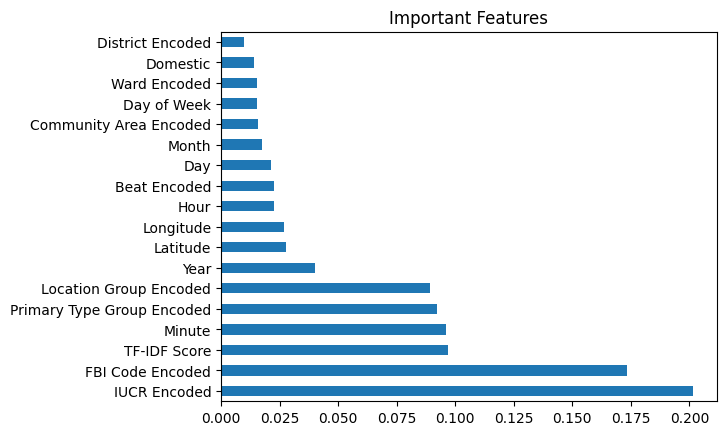

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance from the trained model
importances = pd.Series(rf_clf.feature_importances_, index=X_train.columns)
importances.nlargest(19).plot(kind='barh', title="Important Features")
plt.show()

### Random Forest before SMOTE

In [180]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

KeyboardInterrupt: 

In [162]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8964335999690523
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.98      0.93   1121868
        True       0.91      0.66      0.76    377431

    accuracy                           0.90   1499299
   macro avg       0.90      0.82      0.85   1499299
weighted avg       0.90      0.90      0.89   1499299



In [163]:
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df.head(10))

                       Feature  Importance
14                IUCR Encoded    0.160162
15            FBI Code Encoded    0.144537
16  Primary Type Group Encoded    0.104242
7                       Minute    0.063711
2                     Latitude    0.060802
9                 TF-IDF Score    0.060555
3                    Longitude    0.060383
1                         Year    0.049353
5                          Day    0.048429
17      Location Group Encoded    0.044464


### Random Forest with Class_weight Balanced

In [ ]:
# train another random forest model with class_weight='balanced'
model_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')

# Fit the model
model_balanced.fit(X_train, y_train)

# Predict on the test set
y_pred_balanced = model_balanced.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Classification Report:\n", classification_report(y_test, y_pred_balanced))

Accuracy: 0.8963508946514338
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.98      0.93   1121868
        True       0.91      0.65      0.76    377431

    accuracy                           0.90   1499299
   macro avg       0.90      0.81      0.85   1499299
weighted avg       0.90      0.90      0.89   1499299



ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (c:\Users\onry_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\__init__.py)

### Random Forest After SMOTE

In [ ]:
# Train a new model on the resampled data
model_resampled = RandomForestClassifier(random_state=42)

# Fit the model
model_resampled.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_resampled = model_resampled.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred_resampled))

Accuracy: 0.8833114675591727
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.94      0.92   1121868
        True       0.81      0.70      0.75    377431

    accuracy                           0.88   1499299
   macro avg       0.86      0.82      0.84   1499299
weighted avg       0.88      0.88      0.88   1499299



NameError: name 'plot_confusion_matrix' is not defined

### XG Boost before Smote

In [173]:
# XG Boost
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(random_state=42)

In [174]:
# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [175]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.89188
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.97      0.93    149540
        True       0.89      0.65      0.75     50460

    accuracy                           0.89    200000
   macro avg       0.89      0.81      0.84    200000
weighted avg       0.89      0.89      0.89    200000



### XG Boost after Smote

In [176]:
# XG Boost with SMOTE resampling
# Initialize the model
xgb_model_resampled = XGBClassifier(random_state=42)

# Fit the model
xgb_model_resampled.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [177]:
# Predict on the test set
y_pred_xgb_resampled = xgb_model_resampled.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_resampled))

Accuracy: 0.87141
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.92      0.91    149540
        True       0.76      0.71      0.74     50460

    accuracy                           0.87    200000
   macro avg       0.83      0.82      0.83    200000
weighted avg       0.87      0.87      0.87    200000



### Ada Boost before SMOTE

In [181]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Initialize the model
ada_model = AdaBoostClassifier(random_state=42)

In [182]:
# Fit the model
ada_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = ada_model.predict(X_test)

c:\Users\onry_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [183]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

Accuracy: 0.8752
Classification Report:
               precision    recall  f1-score   support

       False       0.87      0.97      0.92    149540
        True       0.88      0.59      0.70     50460

    accuracy                           0.88    200000
   macro avg       0.88      0.78      0.81    200000
weighted avg       0.88      0.88      0.87    200000



### Ada Boost after SMOTE

In [184]:
# ADA Boost with SMOTE resampling
# Initialize the model
ada_model_resampled = AdaBoostClassifier(random_state=42)

# Fit the model
ada_model_resampled.fit(X_train_resampled, y_train_resampled)

c:\Users\onry_\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [185]:
# Predict on the test set
y_pred_ada_resampled = ada_model_resampled.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_ada_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred_ada_resampled))

Accuracy: 0.822195
Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.85      0.88    149540
        True       0.62      0.74      0.68     50460

    accuracy                           0.82    200000
   macro avg       0.77      0.80      0.78    200000
weighted avg       0.84      0.82      0.83    200000



### Gradient Boosting after SMOTE

In [186]:
# Gradient Boosting with SMOTE resampling

# Initialize the model
gb_model_resampled = GradientBoostingClassifier(random_state=42)

# Fit the model
gb_model_resampled.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(random_state=42)

In [187]:
# Predict on the test set
y_pred_gb_resampled = gb_model_resampled.predict(X_test)

In [188]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_gb_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred_gb_resampled))

Accuracy: 0.849025
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.89      0.90    149540
        True       0.69      0.72      0.71     50460

    accuracy                           0.85    200000
   macro avg       0.80      0.81      0.80    200000
weighted avg       0.85      0.85      0.85    200000



### Jean's Code Begins

In [20]:
from textblob import TextBlob

# Define a function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [22]:
# Sample 100,000 rows from the DataFrame
df_sample = df.sample(n=1000000, random_state=69)  # random_state for reproducibility

# Now df_sample contains 100,000 randomly selected rows from df
df_sample.shape

(1000000, 15)

In [24]:
from textblob import TextBlob
# Combine columns into a single text column
df_sample['Combined_Text'] = df_sample['Primary Type'] + ' ' + df_sample['Description'] + ' ' + df_sample['Location Description']

#df_sample['TextBlob Sentiment'] = df_sample['Combined_Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df_sample['VADER Sentiment'] = df_sample['Combined_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

from transformers import pipeline

#sentiment_pipeline = pipeline("sentiment-analysis")
#df_sample['Transformer Sentiment'] = df_sample['Combined_Text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])


# Combine different sentiment approaches into a single DataFrame
#df_sample['Sentiment_Comparison'] = list(
#    zip(df_sample['TextBlob Sentiment'],
#        df_sample['VADER Sentiment'],
#        df_sample['Transformer Sentiment'])
#)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jeanr\AppData\Roaming\nltk_data...


ModuleNotFoundError: No module named 'transformers'

In [ ]:
# Combine columns into a single text column
df_sample['Combined_Text'] = df_sample['Primary Type'] + ' ' + df_sample['Description'] + ' ' + df_sample['Location Description']

# Perform sentiment analysis on the combined text
df_sample['Combined Sentiment'] = df_sample['Combined_Text'].apply(get_sentiment)

# Display the sentiment scores
print(df_sample[['Combined_Text', 'Combined Sentiment']])

                                             Combined_Text  Combined Sentiment
3733393              CRIMINAL DAMAGE TO PROPERTY RESIDENCE              -0.400
1946497       OTHER OFFENSE ANIMAL ABUSE/NEGLECT RESIDENCE              -0.125
2488322                            BATTERY SIMPLE SIDEWALK               0.000
4188900  CRIMINAL TRESPASS TO STATE SUP LAND CHA APARTMENT              -0.400
2794468              MOTOR VEHICLE THEFT AUTOMOBILE STREET               0.000
...                                                    ...                 ...
2195822                  CRIMINAL DAMAGE TO VEHICLE STREET              -0.400
1661135                  CRIMINAL DAMAGE TO VEHICLE STREET              -0.400
266177   OTHER OFFENSE VEHICLE TITLE / REGISTRATION OFF...              -0.125
3617985              CRIMINAL DAMAGE TO PROPERTY APARTMENT              -0.400
1643428                        THEFT $500 AND UNDER STREET               0.000

[100000 rows x 2 columns]


In [26]:
df_sample = df_sample.drop(['Combined_Text'], axis=1)

In [28]:
df_sample.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,VADER Sentiment
7680667,12306775,JE158718,03/04/2021 08:35:00 AM,009XX N ORLEANS ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,ALLEY,True,True,1823,18.0,27.0,8.0,08B,0.0
2969113,4894572,HM507153,07/21/2006 04:00:00 PM,016XX W 51ST ST,0820,THEFT,$500 AND UNDER,STREET,False,False,931,9.0,16.0,61.0,06,0.0
3444697,5840812,HN649785,10/15/2007 05:19:01 PM,048XX W BELDEN AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,2522,25.0,31.0,19.0,18,0.0
7000729,11543642,JB563755,12/22/2018 11:30:00 AM,005XX S KEDZIE AVE,0870,THEFT,POCKET-PICKING,CTA TRAIN,False,False,1134,11.0,24.0,27.0,06,0.0
2854516,4760301,HM371862,05/19/2006 09:00:00 AM,0000X W 112TH PL,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,522,5.0,34.0,49.0,06,0.0


In [30]:
df_sample.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
VADER Sentiment         float64
dtype: object

In [32]:
# Drop unnecessary columns
df_sample = df_sample.drop(['Case Number', 'FBI Code','ID','Block','IUCR'], axis=1)

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to 'Primary Type' and 'Description'
for col in ['Primary Type', 'Description']:
    df_sample[col] = le.fit_transform(df_sample[col])

# Apply One-Hot Encoding to the remaining columns
df_sample = pd.get_dummies(df_sample, columns=['Location Description', 'Domestic'], drop_first=True)

# Display the transformed DataFrame
print(df_sample.head())


                           Date  Primary Type  Description  Arrest  Beat  \
7680667  03/04/2021 08:35:00 AM             2          189    True  1823   
2969113  07/21/2006 04:00:00 PM            33            1   False   931   
3444697  10/15/2007 05:19:01 PM            18          344    True  2522   
7000729  12/22/2018 11:30:00 AM            33          335   False  1134   
2854516  05/19/2006 09:00:00 AM            33            1   False   522   

         District  Ward  Community Area  VADER Sentiment  \
7680667      18.0  27.0             8.0              0.0   
2969113       9.0  16.0            61.0              0.0   
3444697      25.0  31.0            19.0              0.0   
7000729      11.0  24.0            27.0              0.0   
2854516       5.0  34.0            49.0              0.0   

         Location Description_AIRCRAFT  ...  \
7680667                          False  ...   
2969113                          False  ...   
3444697                          False  .

In [34]:
df_sample.shape

(1000000, 192)

In [36]:
# Convert 'Date' column to datetime format
df_sample['Date'] = pd.to_datetime(df_sample['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract useful features from the 'Date' column
df_sample['Year'] = df_sample['Date'].dt.year
df_sample['Month'] = df_sample['Date'].dt.month
df_sample['Day'] = df_sample['Date'].dt.day
df_sample['Hour'] = df_sample['Date'].dt.hour
df_sample['Weekday'] = df_sample['Date'].dt.weekday  # 0 = Monday, 6 = Sunday

# Drop the original 'Date' column if no longer needed
df_sample = df_sample.drop('Date', axis=1)

# Display the modified DataFrame
print(df_sample.head())

         Primary Type  Description  Arrest  Beat  District  Ward  \
7680667             2          189    True  1823      18.0  27.0   
2969113            33            1   False   931       9.0  16.0   
3444697            18          344    True  2522      25.0  31.0   
7000729            33          335   False  1134      11.0  24.0   
2854516            33            1   False   522       5.0  34.0   

         Community Area  VADER Sentiment  Location Description_AIRCRAFT  \
7680667             8.0              0.0                          False   
2969113            61.0              0.0                          False   
3444697            19.0              0.0                          False   
7000729            27.0              0.0                          False   
2854516            49.0              0.0                          False   

         Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA  \
7680667                                              False 

In [ ]:
# Step 1: Import Necessary Libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Preprocess Your Dataset
# Assume your dataset is named df_sample and contains columns 'X Coordinate' and 'Y Coordinate'
features = ['X Coordinate', 'Y Coordinate']  # Replace with your relevant columns
X = df_sample[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply DBSCAN
# Initialize DBSCAN with parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
df_sample['Cluster'] = dbscan.fit_predict(X_scaled)

# Step 4: Analyze and Visualize Results
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_sample['Cluster'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.colorbar(label='Cluster Label')
plt.show()

# Step 5: Interpret the Results
clusters = df_sample['Cluster'].unique()
print(f'Clusters found: {clusters}')
print(f'Noise points: {sum(df_sample["Cluster"] == -1)}')

KeyError: "None of [Index(['X Coordinate', 'Y Coordinate'], dtype='object')] are in the [columns]"

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df_sample.drop(columns=['Arrest'])  # Replace 'target_column' with the actual column name
y = df_sample['Arrest']

# Step 4: Split the sampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Scale the data
scaler = StandardScaler()

# Fit the scaler on the training set and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Apply SMOTE to the scaled training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 7: Verify the class distribution after SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution before SMOTE:
Arrest
False    598771
True     201229
Name: count, dtype: int64

Class distribution after SMOTE:
Arrest
False    598771
True     598771
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\jeanr\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Random Forest - Accuracy: 0.8877, Precision: 0.8670, Recall: 0.6537, AUC: 0.5893


C:\Users\jeanr\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jeanr\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


AdaBoost - Accuracy: 0.8284, Precision: 0.6473, Recall: 0.6979, AUC: 0.5532


C:\Users\jeanr\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Gradient Boosting - Accuracy: 0.8699, Precision: 0.7910, Recall: 0.6562, AUC: 0.5491


C:\Users\jeanr\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Logistic Regression - Accuracy: 0.6853, Precision: 0.4205, Recall: 0.6641, AUC: 0.5748


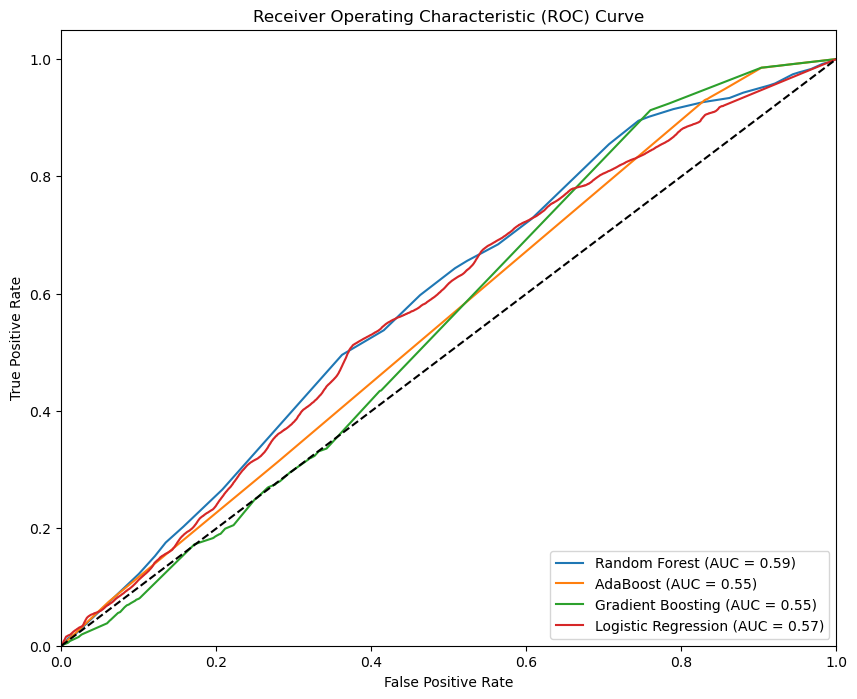

In [46]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
logreg_model = LogisticRegression(random_state=42)

# List of models
models = [rf_model, ada_model, gb_model, logreg_model]
model_names = ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'Logistic Regression']

# Create a plot for ROC Curves
plt.figure(figsize=(10, 8))

# Train and evaluate each model
for model, name in zip(models, model_names):
    # Train the model
    model.fit(X_resampled, y_resampled)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Print metrics
    print(f'{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUC: {roc_auc:.4f}')

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot details
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [18]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 20.5/626.3 kB ? eta -:--:--
   ----------- ---------------------------- 174.1/626.3 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 5.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
